# PLA

In [43]:
import numpy as np
import pandas as pd

In [44]:
#读取数据
data = pd.read_csv('F:\GIT\python-MachineLearningInAction\PLA\data\data1.csv',header=None)
#print(data.shape)
x=data.iloc[:,:2].values
y=data.iloc[:,2:].values
#print(x)
#print(y)

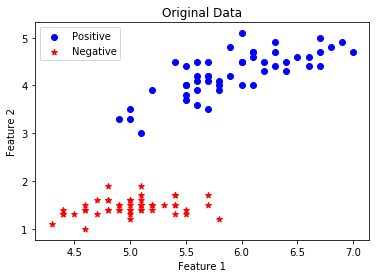

In [45]:
#数据可视化
import matplotlib.pyplot as plt
plt.scatter(x[:50,[0]],x[:50,[1]],color='blue', marker='o', label='Positive')
plt.scatter(x[50:,[0]],x[50:,[1]],color='red',marker='*',label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Original Data')
plt.show()

In [46]:
X=x
X = np.hstack((np.ones((X.shape[0],1)), X))
print(X)

[[1.  7.  4.7]
 [1.  6.4 4.5]
 [1.  6.9 4.9]
 [1.  5.5 4. ]
 [1.  6.5 4.6]
 [1.  5.7 4.5]
 [1.  6.3 4.7]
 [1.  4.9 3.3]
 [1.  6.6 4.6]
 [1.  5.2 3.9]
 [1.  5.  3.5]
 [1.  5.9 4.2]
 [1.  6.  4. ]
 [1.  6.1 4.7]
 [1.  5.6 3.6]
 [1.  6.7 4.4]
 [1.  5.6 4.5]
 [1.  5.8 4.1]
 [1.  6.2 4.5]
 [1.  5.6 3.9]
 [1.  5.9 4.8]
 [1.  6.1 4. ]
 [1.  6.3 4.9]
 [1.  6.1 4.7]
 [1.  6.4 4.3]
 [1.  6.6 4.4]
 [1.  6.8 4.8]
 [1.  6.7 5. ]
 [1.  6.  4.5]
 [1.  5.7 3.5]
 [1.  5.5 3.8]
 [1.  5.5 3.7]
 [1.  5.8 3.9]
 [1.  6.  5.1]
 [1.  5.4 4.5]
 [1.  6.  4.5]
 [1.  6.7 4.7]
 [1.  6.3 4.4]
 [1.  5.6 4.1]
 [1.  5.5 4. ]
 [1.  5.5 4.4]
 [1.  6.1 4.6]
 [1.  5.8 4. ]
 [1.  5.  3.3]
 [1.  5.6 4.2]
 [1.  5.7 4.2]
 [1.  5.7 4.2]
 [1.  6.2 4.3]
 [1.  5.1 3. ]
 [1.  5.7 4.1]
 [1.  5.1 1.4]
 [1.  4.9 1.4]
 [1.  4.7 1.3]
 [1.  4.6 1.5]
 [1.  5.  1.4]
 [1.  5.4 1.7]
 [1.  4.6 1.4]
 [1.  5.  1.5]
 [1.  4.4 1.4]
 [1.  4.9 1.5]
 [1.  5.4 1.5]
 [1.  4.8 1.6]
 [1.  4.8 1.4]
 [1.  4.3 1.1]
 [1.  5.8 1.2]
 [1.  5.7 1.5]
 [1.  5.4 

In [47]:
w = np.random.randn(3,1)  #标准正态分布随机数
print(w)

[[-0.19042569]
 [ 0.97844969]
 [ 0.52003824]]


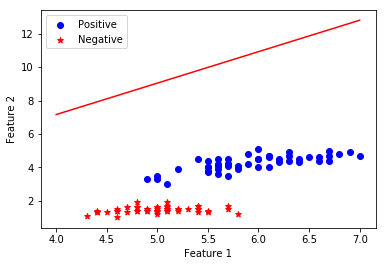

In [48]:
x1=4
y1=(w[0]*1+w[1]*x1)/w[2]
x2=7
y2=(w[0]*1+w[1]*x2)/w[2]
plt.scatter(x[:50,[0]],x[:50,[1]],color='blue', marker='o', label='Positive')
plt.scatter(x[50:,[0]],x[50:,[1]],color='red',marker='*',label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

In [49]:
s = np.dot(X, w)
p=np.multiply(y,s)
#y_pred = np.ones_like(y)    # 预测输出初始化
#loc_n = np.where(s < 0)[0]    # 小于零索引下标
#y_pred[loc_n] = -1
t = np.where(p<0)[0][0]
print(t)
print(y[t])
print(X[t, :])
print(X[t, :].shape)
w += y[t] * X[t, :].reshape((3,1))
print(w)

50
[-1]
[1.  5.1 1.4]
(3,)
[[-1.19042569]
 [-4.12155031]
 [-0.87996176]]


In [58]:
w = np.random.randn(3,1)
yita=0.5
for i in range(100):
    s = np.dot(X, w)
    p=np.multiply(y,s)
    temp = np.where(p<0)[0]
    print(temp)
    num_fault = len(temp)
    print('第%2d次更新，分类错误的点个数：%2d' % (i, num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(p<0)[0][0]
        w += y[t] * X[t, :].reshape((3,1))*yita
#print(w)
print(np.multiply(y,np.dot(X, w)))

[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
第 0次更新，分类错误的点个数：50
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
第 1次更新，分类错误的点个数：50
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
第 2次更新，分类错误的点个数：50
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
第 3次更新，分类错误的点个数：50
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
第 4次更新，分类错误的点个数：50
[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 9

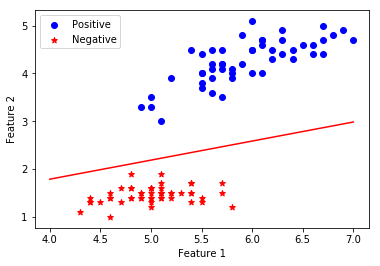

In [59]:
x1=4
y1=-(w[0]*1+w[1]*x1)/w[2]
x2=7
y2=-(w[0]*1+w[1]*x2)/w[2]
plt.scatter(x[:50,[0]],x[:50,[1]],color='blue', marker='o', label='Positive')
plt.scatter(x[50:,[0]],x[50:,[1]],color='red',marker='*',label='Negative')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()